In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()

In [4]:
features=pd.DataFrame(wine.data,columns=wine.feature_names)
target=pd.DataFrame(wine.target,columns=['TARGET'])
df=pd.concat([features,target],axis=1)

In [7]:
x1=np.array(df['hue'])
x2=np.array(df['proline'])
y=np.array(df['TARGET'])

In [10]:
x=np.column_stack((x1,x2))

In [11]:
x.shape

(178, 2)

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [13]:
scaler=MinMaxScaler()

In [14]:
x_train=scaler.fit_transform(xtrain)
x_test=scaler.fit_transform(xtest)

In [15]:
int(np.sqrt(len(x_train)))

11

In [39]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)

In [40]:
classifier.fit(x_train,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [41]:
y_pred=classifier.predict(x_test)

In [42]:
y_pred

array([0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0,
       1])

In [43]:
cm=confusion_matrix(ytest,y_pred)

In [44]:
cm

array([[13,  0,  1],
       [ 1, 15,  3],
       [ 0,  2, 10]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


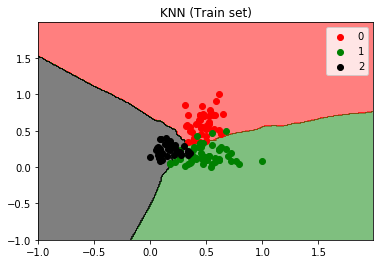

In [45]:
#to plot the clustering
X_set,y_set=x_train,ytrain

X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5,cmap=ListedColormap(('red','green','black')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('red','green','black'))(i),label=j)
plt.title('KNN (Train set)')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


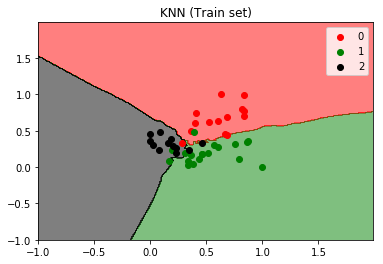

In [46]:
X_set,y_set=x_test,ytest

X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5,cmap=ListedColormap(('red','green','black')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('red','green','black'))(i),label=j)
plt.title('KNN (Train set)')
plt.legend()

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.8444444444444444
